You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# convert week to datetime
trends.loc[:,'week'] = pd.to_datetime(trends['week'], format="%Y-%m-%d")

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [49]:
# Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)?
print(trends.mean())

chatgpt              73.111111
gemini                9.703704
microsoft_copilot     3.685185
dtype: float64


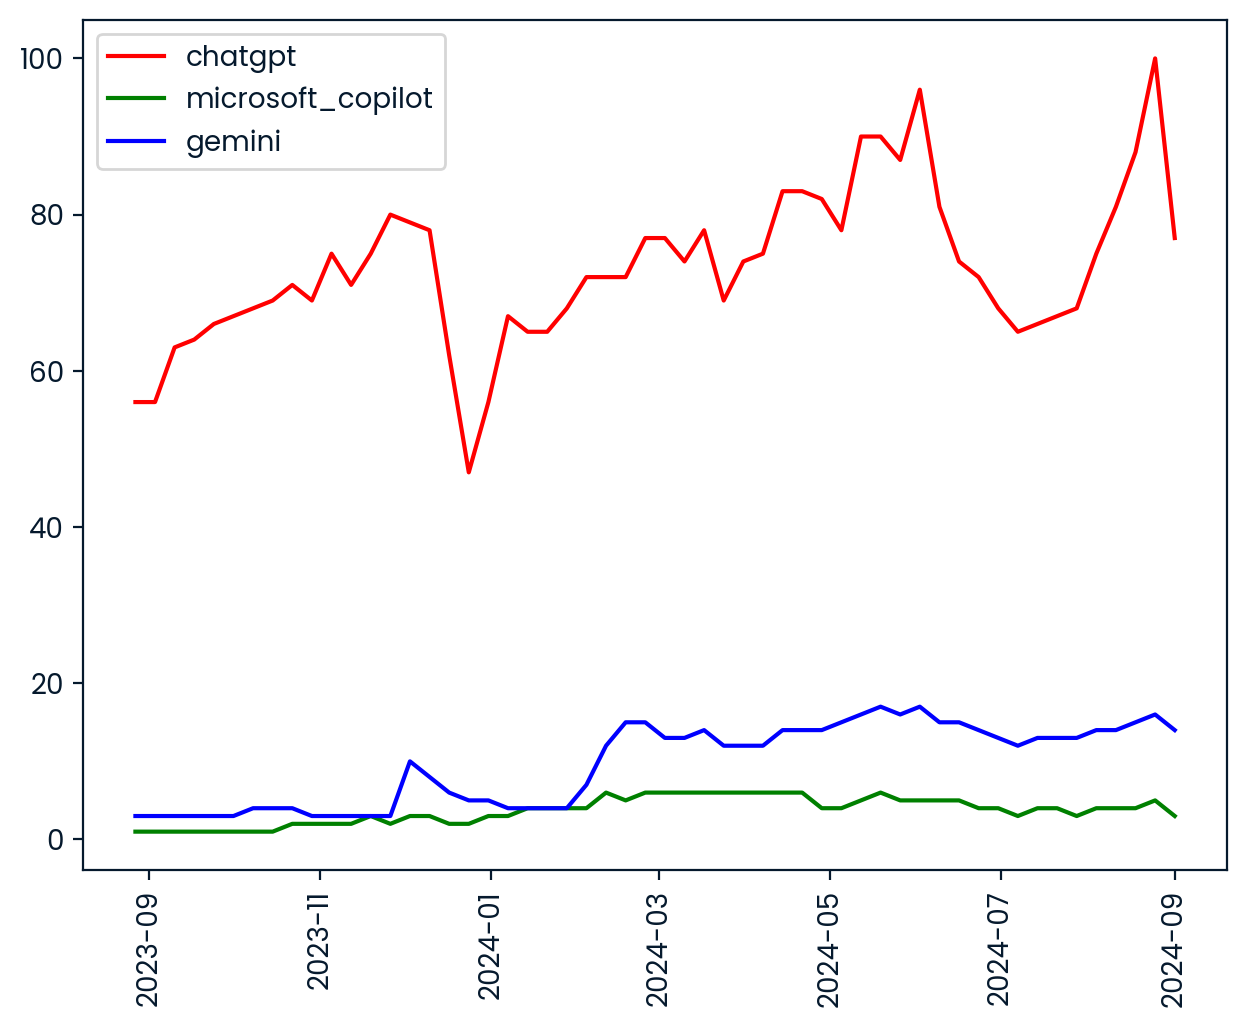

In [50]:
# Create a visualization showing the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time
plt.plot(trends['week'], trends['chatgpt'],c='red')
plt.plot(trends['week'], trends['microsoft_copilot'],c='green')
plt.plot(trends['week'], trends['gemini'],c='blue')
plt.legend(['chatgpt','microsoft_copilot','gemini'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [51]:
# What month had the highest average interest across all tools?
month_trends = trends.groupby(trends['week'].dt.month).mean()
month_trends.loc[:,'total_avg'] = month_trends[['chatgpt', 'microsoft_copilot', 'gemini']].mean(axis=1)
print(month_trends.sort_values('total_avg', ascending=False))

      chatgpt  gemini  microsoft_copilot  total_avg
week                                               
5       86.25   16.00               5.00  35.750000
4       80.75   13.50               5.50  33.250000
6       78.20   14.80               4.60  32.533333
8       80.00   12.40               3.60  32.000000
3       74.40   12.80               6.00  31.066667
2       73.25   12.25               5.25  30.250000
7       66.50   12.75               3.50  27.583333
11      75.25    3.00               2.25  26.833333
1       66.25    4.00               3.75  24.666667
10      68.80    3.60               1.40  24.600000
12      64.40    6.80               2.60  24.600000
9       65.20    5.20               1.40  23.933333


In [52]:
# Answers
most_consistent_tool = 'chatgpt'
gpt_dip = 'December 2023'
best_month = 'May'